Ingresa el nombre del equipo: Tigre


C:\Users\Gilberto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


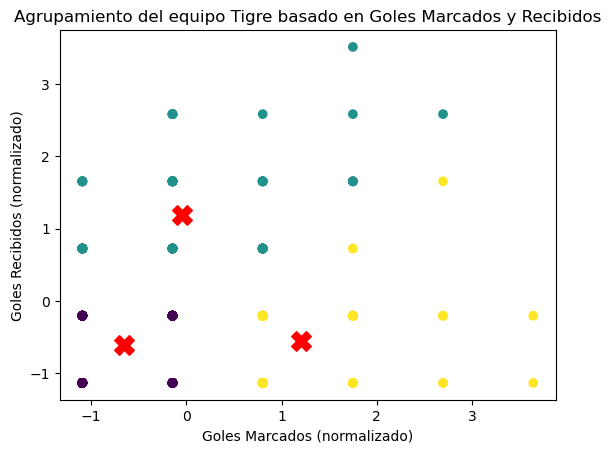

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"

# Cargar datos desde el archivo CSV
data = pd.read_csv('ARG.csv')

# Ingresar el nombre del equipo dinámicamente
equipo = input("Ingresa el nombre del equipo: ")

# Filtrar datos para el equipo seleccionado, ya sea como local o visitante
equipo_local = data[data['Home'] == equipo]
equipo_visitante = data[data['Away'] == equipo]

# Crear un nuevo DataFrame con las estadísticas de goles marcados y recibidos
equipo_stats = pd.DataFrame({
    'Goles_Marcados': pd.concat([equipo_local['HG'], equipo_visitante['AG']], ignore_index=True),
    'Goles_Recibidos': pd.concat([equipo_local['AG'], equipo_visitante['HG']], ignore_index=True)
})

# Normalizar los datos (es importante para K-means)
equipo_stats_normalized = (equipo_stats - equipo_stats.mean()) / equipo_stats.std()

# Definir el número de grupos (k)
k = 3

# Crear el modelo de k-means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Ajustar el modelo a tus datos
kmeans.fit(equipo_stats_normalized)

# Agregar las etiquetas de grupo al DataFrame original
equipo_stats['Cluster'] = kmeans.labels_

# Visualizar los resultados
plt.scatter(equipo_stats_normalized['Goles_Marcados'], equipo_stats_normalized['Goles_Recibidos'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title(f'Agrupamiento del equipo {equipo} basado en Goles Marcados y Recibidos')
plt.xlabel('Goles Marcados (normalizado)')
plt.ylabel('Goles Recibidos (normalizado)')
plt.show()
